In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
#replace file location according to your saved address of files being used. Here I used my google drive location access.
matches = pd.read_csv('/content/drive/MyDrive/IPL Ball by ball Analysis/data/raw/matches_updated_ipl_upto_2025.csv')
deliveries = pd.read_csv('/content/drive/MyDrive/IPL Ball by ball Analysis/data/raw/deliveries_updated_ipl_upto_2025.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
matches.shape

(1169, 28)

In [6]:
deliveries.shape

(278205, 20)

In [7]:
matches.head()


,season,venue,event,winner_runs,umpire2,toss_winner,date,neutralvenue,umpire1,city,reserve_umpire,winner,eliminator,date1,method,team1,toss_decision,gender,team2,balls_per_over,winner_wickets,tv_umpire,player_of_match,match_referee,outcome,date2,match_number,matchId
0,2007/08,M Chinnaswamy Stadium,Indian Premier League,140.0,RE Koertzen,Royal Challengers Bangalore,2008-04-18,NaN,Asad Rauf,Bangalore,VN Kulkarni,Kolkata Knight Riders,NaN,NaN,NaN,Royal Challengers Bangalore,field,male,Kolkata Knight Riders,6,NaN,AM Saheba,BB McCullum,J Srinath,NaN,NaN,1.0,335982
1,2007/08,"Punjab Cricket Association Stadium, Mohali",Indian Premier League,33.0,SL Shastri,Chennai Super Kings,2008-04-19,NaN,MR Benson,Chandigarh,MSS Ranawat,Chennai Super Kings,NaN,NaN,NaN,Kings XI Punjab,bat,male,Chennai Super Kings,6,NaN,RB Tiffin,MEK Hussey,S Venkataraghavan,NaN,NaN,2.0,335983
2,2007/08,Feroz Shah Kotla,Indian Premier League,NaN,GA Pratapkumar,Rajasthan Royals,2008-04-19,NaN,Aleem Dar,Delhi,NaN,Delhi Daredevils,NaN,NaN,NaN,Delhi Daredevils,bat,male,Rajasthan Royals,6,9.0,IL Howell,MF Maharoof,GR Viswanath,NaN,NaN,3.0,335984
3,2007/08,Eden Gardens,Indian Premier League,NaN,K Hariharan,Deccan Chargers,2008-04-20,NaN,BF Bowden,Kolkata,F Gomes,Kolkata Knight Riders,NaN,NaN,NaN,Kolkata Knight Riders,bat,male,Deccan Chargers,6,5.0,Asad Rauf,DJ Hussey,FM Engineer,NaN,NaN,4.0,335986
4,2007/08,Wankhede Stadium,Indian Premier League,NaN,DJ Harper,Mumbai Indians,2008-04-20,NaN,SJ Davis,Mumbai,SN Bandekar,Royal Challengers Bangalore,NaN,NaN,NaN,Mumbai Indians,bat,male,Royal Challengers Bangalore,6,5.0,AV Jayaprakash,MV Boucher,J Srinath,NaN,NaN,5.0,335985


In [8]:
deliveries.head()

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,date
0,335982,1,0.1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2008-04-18
1,335982,1,0.2,0,2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
2,335982,1,0.3,0,3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
3,335982,1,0.4,0,4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
4,335982,1,0.5,0,5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18


In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           1169 non-null   object 
 1   venue            1169 non-null   object 
 2   event            1169 non-null   object 
 3   winner_runs      531 non-null    float64
 4   umpire2          1169 non-null   object 
 5   toss_winner      1169 non-null   object 
 6   date             1169 non-null   object 
 7   neutralvenue     77 non-null     object 
 8   umpire1          1169 non-null   object 
 9   city             1118 non-null   object 
 10  reserve_umpire   1145 non-null   object 
 11  winner           1146 non-null   object 
 12  eliminator       15 non-null     object 
 13  date1            2 non-null      object 
 14  method           19 non-null     object 
 15  team1            1169 non-null   object 
 16  toss_decision    1169 non-null   object 
 17  gender        

In [10]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278205 entries, 0 to 278204
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   matchId           278205 non-null  int64  
 1   inning            278205 non-null  int64  
 2   over_ball         278205 non-null  float64
 3   over              278205 non-null  int64  
 4   ball              278205 non-null  int64  
 5   batting_team      278205 non-null  object 
 6   bowling_team      278205 non-null  object 
 7   batsman           278205 non-null  object 
 8   non_striker       278205 non-null  object 
 9   bowler            278205 non-null  object 
 10  batsman_runs      278205 non-null  int64  
 11  extras            278205 non-null  int64  
 12  isWide            9080 non-null    float64
 13  isNoBall          1163 non-null    float64
 14  Byes              701 non-null     float64
 15  LegByes           4215 non-null    float64
 16  Penalty           2 

In [11]:
matches.isna().sum()

,0
season,0
venue,0
event,0
winner_runs,638
umpire2,0
toss_winner,0
date,0
neutralvenue,1092
umpire1,0
city,51


In [12]:
deliveries.isna().sum()

,0
matchId,0
inning,0
over_ball,0
over,0
ball,0
batting_team,0
bowling_team,0
batsman,0
non_striker,0
bowler,0


In [13]:
matches['team1'].value_counts()

,count
team1,
Royal Challengers Bangalore,135
Chennai Super Kings,134
Mumbai Indians,132
Kolkata Knight Riders,127
Rajasthan Royals,105
Sunrisers Hyderabad,94
Kings XI Punjab,92
Delhi Daredevils,85
Delhi Capitals,47


# Renaming Old team names to new ones
The old names of the same franchises are replaced with new ones using the below code.


In [14]:
team_name_map = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
    'Kings XI Punjab': 'Punjab Kings'
}

matches.replace(team_name_map, inplace=True)
deliveries.replace(team_name_map, inplace=True)


In [15]:
matches.head(100)

,season,venue,event,winner_runs,umpire2,toss_winner,date,neutralvenue,umpire1,city,reserve_umpire,winner,eliminator,date1,method,team1,toss_decision,gender,team2,balls_per_over,winner_wickets,tv_umpire,player_of_match,match_referee,outcome,date2,match_number,matchId
0,2007/08,M Chinnaswamy Stadium,Indian Premier League,140.0,RE Koertzen,Royal Challengers Bengaluru,2008-04-18,NaN,Asad Rauf,Bangalore,VN Kulkarni,Kolkata Knight Riders,NaN,NaN,NaN,Royal Challengers Bengaluru,field,male,Kolkata Knight Riders,6,NaN,AM Saheba,BB McCullum,J Srinath,NaN,NaN,1.0,335982
1,2007/08,"Punjab Cricket Association Stadium, Mohali",Indian Premier League,33.0,SL Shastri,Chennai Super Kings,2008-04-19,NaN,MR Benson,Chandigarh,MSS Ranawat,Chennai Super Kings,NaN,NaN,NaN,Punjab Kings,bat,male,Chennai Super Kings,6,NaN,RB Tiffin,MEK Hussey,S Venkataraghavan,NaN,NaN,2.0,335983
2,2007/08,Feroz Shah Kotla,Indian Premier League,NaN,GA Pratapkumar,Rajasthan Royals,2008-04-19,NaN,Aleem Dar,Delhi,NaN,Delhi Capitals,NaN,NaN,NaN,Delhi Capitals,bat,male,Rajasthan Royals,6,9.0,IL Howell,MF Maharoof,GR Viswanath,NaN,NaN,3.0,335984
3,2007/08,Eden Gardens,Indian Premier League,NaN,K Hariharan,Deccan Chargers,2008-04-20,NaN,BF Bowden,Kolkata,F Gomes,Kolkata Knight Riders,NaN,NaN,NaN,Kolkata Knight Riders,bat,male,Deccan Chargers,6,5.0,Asad Rauf,DJ Hussey,FM Engineer,NaN,NaN,4.0,335986
4,2007/08,Wankhede Stadium,Indian Premier League,NaN,DJ Harper,Mumbai Indians,2008-04-20,NaN,SJ Davis,Mumbai,SN Bandekar,Royal Challengers Bengaluru,NaN,NaN,NaN,Mumbai Indians,bat,male,Royal Challengers Bengaluru,6,5.0,AV Jayaprakash,MV Boucher,J Srinath,NaN,NaN,5.0,335985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2009,De Beers Diamond Oval,Indian Premier League,53.0,HDPK Dharmasena,Deccan Chargers,2009-05-11,True,GAV Baxter,Kimberley,KH Hurter,Deccan Chargers,NaN,NaN,NaN,Deccan Chargers,bat,male,Rajasthan Royals,6,NaN,S Asnani,DR Smith,J Srinath,NaN,NaN,40.0,392220
96,2009,SuperSport Park,Indian Premier League,NaN,SS Hazare,Royal Challengers Bengaluru,2009-05-12,True,M Erasmus,Centurion,JD Cloete,Royal Challengers Bengaluru,NaN,NaN,NaN,Royal Challengers Bengaluru,field,male,Kolkata Knight Riders,6,6.0,RE Koertzen,LRPL Taylor,Yashpal Sharma,NaN,NaN,41.0,392221
97,2009,SuperSport Park,Indian Premier League,NaN,RE Koertzen,Punjab Kings,2009-05-12,True,SS Hazare,Centurion,JD Cloete,Mumbai Indians,NaN,NaN,NaN,Punjab Kings,bat,male,Mumbai Indians,6,8.0,M Erasmus,Harbhajan Singh,Yashpal Sharma,NaN,NaN,42.0,392222
98,2009,Kingsmead,Indian Premier League,12.0,SL Shastri,Deccan Chargers,2009-05-13,True,DJ Harper,Durban,MW Brown,Delhi Capitals,NaN,NaN,NaN,Deccan Chargers,field,male,Delhi Capitals,6,NaN,RB Tiffin,R Bhatia,D Govindjee,NaN,NaN,43.0,392223


In [16]:
matches['team1'].value_counts()

,count
team1,
Royal Challengers Bengaluru,152
Punjab Kings,134
Chennai Super Kings,134
Mumbai Indians,132
Delhi Capitals,132
Kolkata Knight Riders,127
Rajasthan Royals,105
Sunrisers Hyderabad,94
Deccan Chargers,39


Categorizing Overs into Powerplay, Middle and death Overs.


In [17]:
deliveries['total_runs'] = deliveries['batsman_runs'] + deliveries['extras']
deliveries['is_powerplay'] = deliveries['over'] < 6
deliveries['is_middle_overs'] = (deliveries['over'] >=6) & (deliveries['over'] <16)
deliveries['is_death'] = deliveries['over'] >= 16

In [18]:
deliveries.head()

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,date,total_runs,is_powerplay,is_middle_overs,is_death
0,335982,1,0.1,0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2008-04-18,1,True,False,False
1,335982,1,0.2,0,2,Kolkata Knight Riders,Royal Challengers Bengaluru,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18,0,True,False,False
2,335982,1,0.3,0,3,Kolkata Knight Riders,Royal Challengers Bengaluru,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18,1,True,False,False
3,335982,1,0.4,0,4,Kolkata Knight Riders,Royal Challengers Bengaluru,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18,0,True,False,False
4,335982,1,0.5,0,5,Kolkata Knight Riders,Royal Challengers Bengaluru,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18,0,True,False,False


# **Batting Stats**

In [19]:
batter_stats = deliveries.groupby('batsman').agg(
    balls_faced=('ball', 'count'),
    runs_scored=('batsman_runs', 'sum'),
    dismissals=('player_dismissed', lambda x: x.notna().sum())
).reset_index()

batter_stats['average'] = batter_stats['runs_scored'] / batter_stats['dismissals']
batter_stats['strike_rate'] = (batter_stats['runs_scored'] / batter_stats['balls_faced']) * 100

batter_stats = batter_stats[batter_stats['balls_faced'] >= 300]
batter_stats.sort_values(by='runs_scored', ascending=False).head()


,batsman,balls_faced,runs_scored,dismissals,average,strike_rate
659,V Kohli,6702,8671,231,37.536797,129.379290
501,RG Sharma,5475,7048,246,28.650407,128.730594
536,S Dhawan,5483,6769,194,34.891753,123.454313
151,DA Warner,4849,6567,164,40.042683,135.429986
570,SK Raina,4177,5536,168,32.952381,132.535312


## **Batter Consistency Index – Rationale**

In T20 cricket, evaluating a batter purely based on average or strike rate can be misleading.

- **Batting Average** reflects a player's ability to stay at the crease and avoid dismissals.
- **Strike Rate** reflects scoring intent and scoring speed, which is crucial in the T20 format.

To capture both reliability and attacking intent, a **custom Consistency Index** was created using a weighted combination of average and strike rate:

Consistency Index = (Average × 0.6) + (Strike Rate × 0.4)

The higher weight assigned to average reflects the importance of consistency and stability, while still accounting for scoring tempo through strike rate.

This metric is not meant to be an absolute measure of player quality, but rather a comparative tool to identify batters who balance reliability with scoring impact.


In [20]:
batter_stats['consistency_index'] = (
    batter_stats['average'] * 0.6 +
    batter_stats['strike_rate'] * 0.4
)


In [21]:
top_consistent = batter_stats.sort_values(by='consistency_index', ascending=False).head(10)
top_consistent

,batsman,balls_faced,runs_scored,dismissals,average,strike_rate,consistency_index
213,H Klaasen,907,1480,36,41.111111,163.175303,89.936788
633,T Stubbs,442,711,17,41.823529,160.859729,89.438009
470,Priyansh Arya,310,545,18,30.277778,175.806452,88.489247
450,PD Salt,623,1056,32,33.000000,169.502408,87.600963
98,B Sai Sudharsan,1279,1793,35,51.228571,140.187647,86.812201
611,Shashank Singh,510,773,18,42.944444,151.568627,86.394118
644,TM Head,706,1146,33,34.727273,162.322946,85.765542
412,N Pooran,1433,2293,67,34.223881,160.013957,84.539911
31,AB de Villiers,3487,5181,125,41.448000,148.580442,84.300977
639,TH David,524,846,26,32.538462,161.450382,84.103230


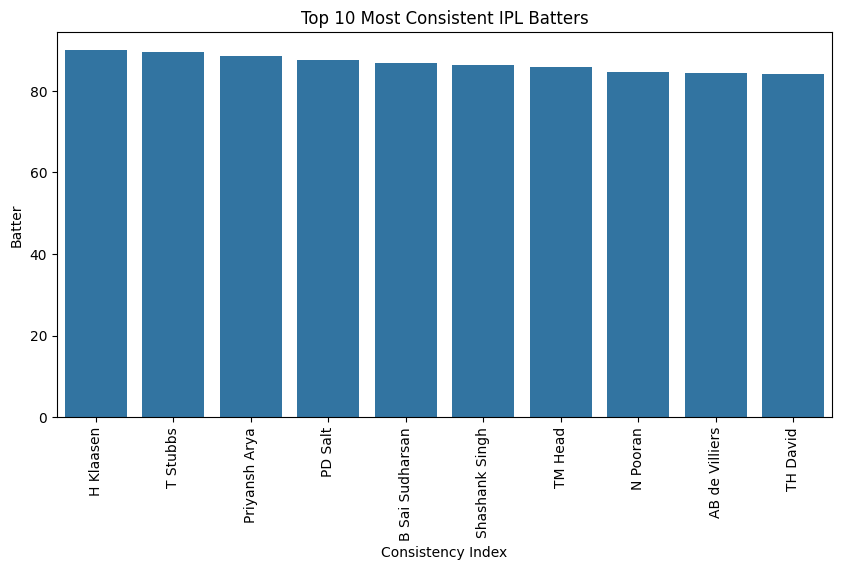

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=top_consistent,
    x='batsman',
    y='consistency_index'
)
plt.title("Top 10 Most Consistent IPL Batters")
plt.xlabel("Consistency Index")
plt.ylabel("Batter")
plt.xticks(rotation=90)
plt.show()


# Bowler Stats
**Economy:**  Runs conceded by a bowler per over. Shows how defending the bolwer is.

**Bowling Average**: Runs conceded by a bowler per wicket.

**Bowling Strike Rate:** Balls Bowled by a bowler per wicket.

This bowling stats are crucial to determine how effective the bowler is,  especially in T20 games.


In [23]:
bowler_stats = deliveries.groupby('bowler').agg(
    balls_bowled=('ball', 'count'),
    runs_conceded=('total_runs', 'sum'),
    wickets_taken=('player_dismissed', lambda x: x.notna().sum())
    ).reset_index()
bowler_stats['overs'] = bowler_stats['balls_bowled']/6
bowler_stats['economy'] = bowler_stats['runs_conceded'] / bowler_stats['overs']
bowler_stats['bowling_average'] = bowler_stats['runs_conceded'] / bowler_stats['wickets_taken']
bowler_stats['bowling_strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets_taken']


In [24]:
bowler_stats

,bowler,balls_bowled,runs_conceded,wickets_taken,overs,economy,bowling_average,bowling_strike_rate
0,A Ashish Reddy,270,400,19,45.000000,8.888889,21.052632,14.210526
1,A Badoni,35,50,4,5.833333,8.571429,12.500000,8.750000
2,A Chandila,234,245,11,39.000000,6.282051,22.272727,21.272727
3,A Choudhary,108,144,5,18.000000,8.000000,28.800000,21.600000
4,A Dananjaya,25,47,0,4.166667,11.280000,inf,inf
...,...,...,...,...,...,...,...,...
546,Yash Thakur,475,782,28,79.166667,9.877895,27.928571,16.964286
547,Yudhvir Singh,145,257,8,24.166667,10.634483,32.125000,18.125000
548,Yuvraj Singh,882,1091,39,147.000000,7.421769,27.974359,22.615385
549,Z Khan,2276,2860,119,379.333333,7.539543,24.033613,19.126050


In [25]:
bowler_stats = bowler_stats[bowler_stats['balls_bowled'] >= 300]

In [26]:
bowler_stats

,bowler,balls_bowled,runs_conceded,wickets_taken,overs,economy,bowling_average,bowling_strike_rate
7,A Kumble,983,1089,49,163.833333,6.646999,22.224490,20.061224
8,A Mishra,3444,4193,183,574.000000,7.304878,22.912568,18.819672
9,A Mithun,312,477,8,52.000000,9.173077,59.625000,39.000000
10,A Nehra,1974,2537,121,329.000000,7.711246,20.966942,16.314050
12,A Nortje,1142,1701,63,190.333333,8.936953,27.000000,18.126984
...,...,...,...,...,...,...,...,...
544,YS Chahal,3905,5112,229,650.833333,7.854545,22.323144,17.052402
545,Yash Dayal,920,1412,45,153.333333,9.208696,31.377778,20.444444
546,Yash Thakur,475,782,28,79.166667,9.877895,27.928571,16.964286
548,Yuvraj Singh,882,1091,39,147.000000,7.421769,27.974359,22.615385


## **Top 10 bowlers by economy.**

Bowlers with low economy rates help control scoring pressure, especially useful in powerplay and death overs.

In [27]:
top_economy =  bowler_stats.sort_values(by='economy',ascending=True).head(10).reset_index()
top_economy[['bowler', 'economy','wickets_taken']] #displays only specified columns.

,bowler,economy,wickets_taken
0,A Kumble,6.646999,49
1,GD McGrath,6.674772,14
2,M Muralitharan,6.698292,67
3,J Yadav,6.738693,9
4,RE van der Merwe,6.791209,25
5,DW Steyn,6.791411,105
6,SP Narine,6.825153,212
7,DL Vettori,6.833121,34
8,J Botha,6.922426,27
9,SL Malinga,7.032952,188


## **Top Wicket taking Ability**

High wicket-takers may not always be economical but provide breakthroughs.


In [28]:
top_wicket_takers = bowler_stats.sort_values(by='wickets_taken',ascending=False).head(10).reset_index()
top_wicket_takers[['bowler','wickets_taken','economy']]

,bowler,wickets_taken,economy
0,YS Chahal,229,7.854545
1,B Kumar,213,7.593878
2,SP Narine,212,6.825153
3,DJ Bravo,207,8.075243
4,R Ashwin,205,7.051356
5,JJ Bumrah,203,7.188256
6,PP Chawla,201,7.977920
7,SL Malinga,188,7.032952
8,A Mishra,183,7.304878
9,RA Jadeja,179,7.621032


**Death Over Specialists**

Death over specialists control games in last overs of game by providing breakthroughs and defending runs scored by opponents. They have special skills like slower balls, field placements and adjusting line and lengths as per the batters weakness.

In [29]:
death_overs = deliveries[deliveries['is_death']]
death_bowling_stats = death_overs.groupby('bowler').agg(
    death_balls_bowled=('ball', 'count'),
    death_runs_conceded=('total_runs', 'sum'),
    death_wickets_taken=('player_dismissed', lambda x: x.notna().sum())
    ).reset_index()
death_bowling_stats['death_economy'] = death_bowling_stats['death_runs_conceded'] / (death_bowling_stats['death_balls_bowled']/6)
death_bowling_stats = death_bowling_stats[death_bowling_stats['death_balls_bowled'] >= 60]


In [30]:
top_death_bowlers = death_bowling_stats.sort_values(by='death_economy').head(10)
top_death_bowlers[['bowler','death_economy']]

,bowler,death_economy
381,Sohail Tanvir,6.734694
265,Noor Ahmad,7.084337
210,M Ashwin,7.402597
97,DE Bollinger,7.444444
352,SL Malinga,7.784456
6,A Kumble,7.928571
197,Kuldeep Yadav,7.948454
220,M Theekshana,7.962617
359,SP Narine,7.971317
181,KH Pandya,7.981651


##**Bowler Economy vs Wickets**

The scatter plot of 'Bowler Economy vs Wickets' shows the distribution of bowlers based on their economy rate (runs conceded per over) and the total number of wickets they have taken. Here are some observations:

**Majority of Bowlers**: Most bowlers are clustered with economy rates between approximately 7 and 9 runs per over, with their wickets taken ranging from around 0 to 100. This indicates that many bowlers operate within a similar range of efficiency.

**High Wicket-Takers**: There are several bowlers who have taken a significantly higher number of wickets (over 150-200 wickets) while maintaining a relatively good economy rate, typically below 8. These bowlers demonstrate both wicket-taking ability and control over run flow.

**Trade-off**: The plot generally suggests a trade-off: bowlers with very high wicket counts tend to have slightly higher economy rates compared to the most economical bowlers, who might have fewer wickets. However, the most effective bowlers manage to balance both.

**Outliers**: Some bowlers show very low economy rates but also low wicket counts, suggesting a more defensive bowling style. Conversely, a few bowlers have higher economy rates but also managed to pick up a good number of wickets, indicating a more attacking style that might sometimes be expensive but also provides breakthroughs.
Overall, the plot helps to visually distinguish between defensive bowlers (low economy, low wickets), attacking bowlers (moderate to high economy, high wickets), and effective all-round bowlers (good economy, high wickets).

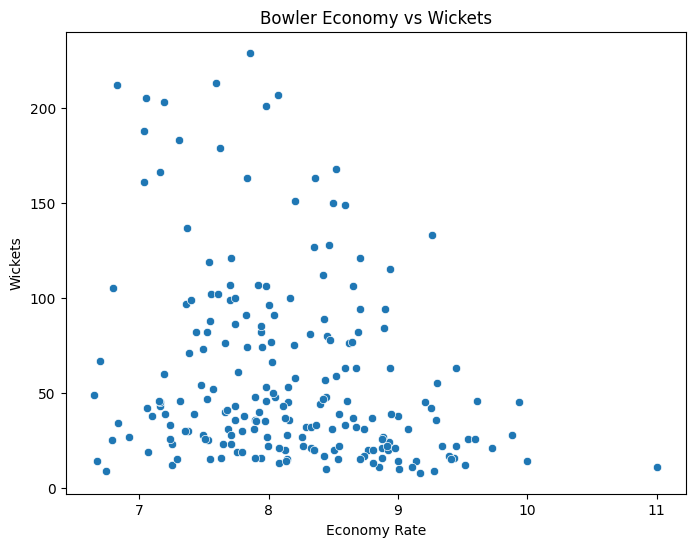

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=bowler_stats,
    x='economy',
    y='wickets_taken'
)
plt.title("Bowler Economy vs Wickets")
plt.xlabel("Economy Rate")
plt.ylabel("Wickets")
plt.show()

# **Venu & Match Context Analysis**

In [32]:
merged = deliveries.merge(
    matches[['matchId', 'venue', 'toss_winner', 'toss_decision', 'winner']],
    left_on='matchId',
    right_on='matchId',
    how='left'
)
merged

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,date,total_runs,is_powerplay,is_middle_overs,is_death,venue,toss_winner,toss_decision,winner
0,335982,1,0.1,0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2008-04-18,1,True,False,False,M Chinnaswamy Stadium,Royal Challengers Bengaluru,field,Kolkata Knight Riders
1,335982,1,0.2,0,2,Kolkata Knight Riders,Royal Challengers Bengaluru,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18,0,True,False,False,M Chinnaswamy Stadium,Royal Challengers Bengaluru,field,Kolkata Knight Riders
2,335982,1,0.3,0,3,Kolkata Knight Riders,Royal Challengers Bengaluru,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18,1,True,False,False,M Chinnaswamy Stadium,Royal Challengers Bengaluru,field,Kolkata Knight Riders
3,335982,1,0.4,0,4,Kolkata Knight Riders,Royal Challengers Bengaluru,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18,0,True,False,False,M Chinnaswamy Stadium,Royal Challengers Bengaluru,field,Kolkata Knight Riders
4,335982,1,0.5,0,5,Kolkata Knight Riders,Royal Challengers Bengaluru,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18,0,True,False,False,M Chinnaswamy Stadium,Royal Challengers Bengaluru,field,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278200,1473511,2,19.2,19,2,Punjab Kings,Royal Challengers Bengaluru,Shashank Singh,KA Jamieson,JR Hazlewood,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-03,0,False,False,True,"Narendra Modi Stadium, Ahmedabad",Punjab Kings,field,Royal Challengers Bengaluru
278201,1473511,2,19.3,19,3,Punjab Kings,Royal Challengers Bengaluru,Shashank Singh,KA Jamieson,JR Hazlewood,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-03,6,False,False,True,"Narendra Modi Stadium, Ahmedabad",Punjab Kings,field,Royal Challengers Bengaluru
278202,1473511,2,19.4,19,4,Punjab Kings,Royal Challengers Bengaluru,Shashank Singh,KA Jamieson,JR Hazlewood,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-03,4,False,False,True,"Narendra Modi Stadium, Ahmedabad",Punjab Kings,field,Royal Challengers Bengaluru
278203,1473511,2,19.5,19,5,Punjab Kings,Royal Challengers Bengaluru,Shashank Singh,KA Jamieson,JR Hazlewood,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-03,6,False,False,True,"Narendra Modi Stadium, Ahmedabad",Punjab Kings,field,Royal Challengers Bengaluru


## Venue Wise Scoring Analysis


In [33]:
venue_stats = merged.groupby('venue').agg(
    total_runs=('total_runs', 'sum'),
    balls=('ball', 'count')
).reset_index()

venue_stats['avg_runs_per_over'] = venue_stats['total_runs'] / (venue_stats['balls'] / 6)

venue_stats = venue_stats.sort_values(by='avg_runs_per_over', ascending=False)
venue_stats


,venue,total_runs,balls,avg_runs_per_over
30,Maharaja Yadavindra Singh International Cricke...,436,248,10.548387
12,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,1549,963,9.651090
19,"Himachal Pradesh Cricket Association Stadium, ...",2072,1298,9.577812
15,"Eden Gardens, Kolkata",8566,5448,9.433921
1,"Arun Jaitley Stadium, Delhi",8835,5687,9.321259
44,"Rajiv Gandhi International Stadium, Uppal, Hyd...",6873,4451,9.264884
24,"M Chinnaswamy Stadium, Bengaluru",7009,4549,9.244669
40,"Punjab Cricket Association IS Bindra Stadium, ...",1856,1207,9.226181
48,"Sawai Mansingh Stadium, Jaipur",6095,4044,9.043027
33,"Narendra Modi Stadium, Ahmedabad",11772,7923,8.914805


In [34]:
match_stats = merged.groupby(['matchId', 'venue']).agg(
    total_runs=('total_runs', 'sum'),
    balls=('ball', 'count')
).reset_index()

match_stats = match_stats[['matchId','venue','total_runs']]
match_stats.sort_values(by='total_runs', ascending=False)

,matchId,venue,total_runs
1053,1426268,"M Chinnaswamy Stadium, Bengaluru",549
1096,1473439,"Rajiv Gandhi International Stadium, Uppal, Hyd...",528
1065,1426280,"Eden Gardens, Kolkata",523
1031,1422126,"Rajiv Gandhi International Stadium, Uppal, Hyd...",523
1066,1426281,"Arun Jaitley Stadium, Delhi",504
...,...,...,...
1149,1473492,"Rajiv Gandhi International Stadium, Uppal, Hyd...",133
994,1359519,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,125
1152,1473495,"Himachal Pradesh Cricket Association Stadium, ...",122
744,1178424,M.Chinnaswamy Stadium,103


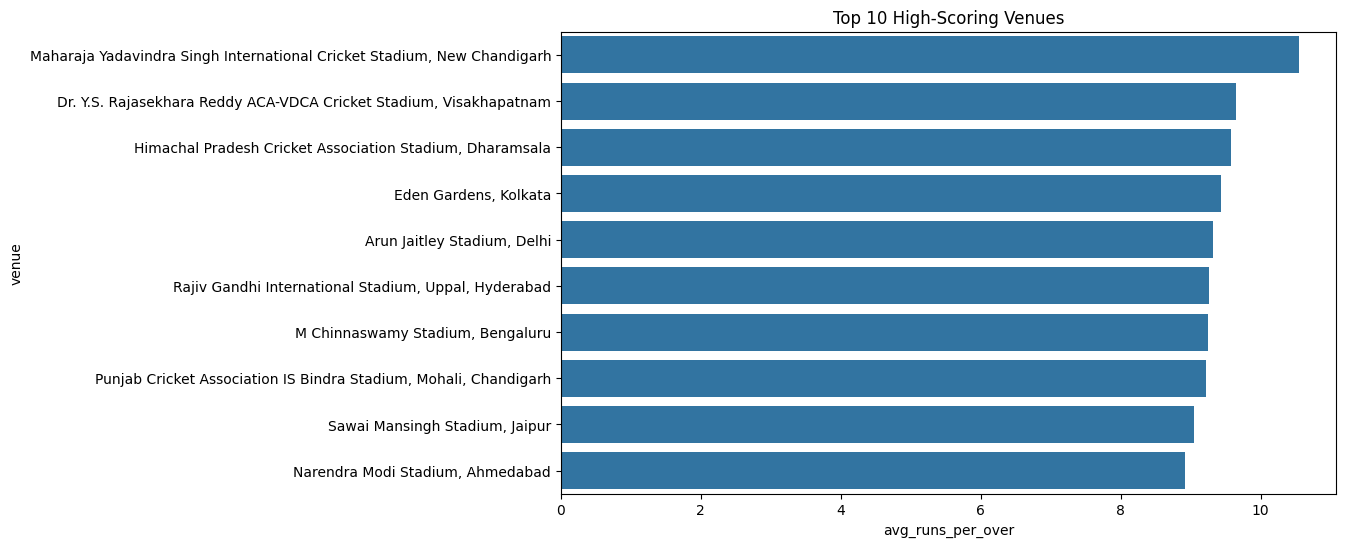

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(data=venue_stats.head(10), x='avg_runs_per_over', y='venue')
plt.title("Top 10 High-Scoring Venues")
plt.show()


## Toss Impact Analysis

In [36]:
toss_analysis = matches.copy()
toss_analysis['toss_win_match_win'] = (
    toss_analysis['toss_winner'] == toss_analysis['winner']
)

toss_win_percentage = (
    toss_analysis['toss_win_match_win'].mean() * 100
)

print(toss_win_percentage)


50.556030795551756


In [37]:
bat_first = matches[matches['toss_decision'] == 'bat']
field_first = matches[matches['toss_decision'] == 'field']

bat_first_win_pct = (bat_first['winner'] == bat_first['team1']).mean() * 100
field_first_win_pct = (field_first['winner'] == field_first['team2']).mean() * 100

print(f'Percent of Matches won Batting First: {bat_first_win_pct}')
print(f'Percent of Matches won Fielding First: {field_first_win_pct}')


Percent of Matches won Batting First: 54.32098765432099
Percent of Matches won Fielding First: 50.916230366492144


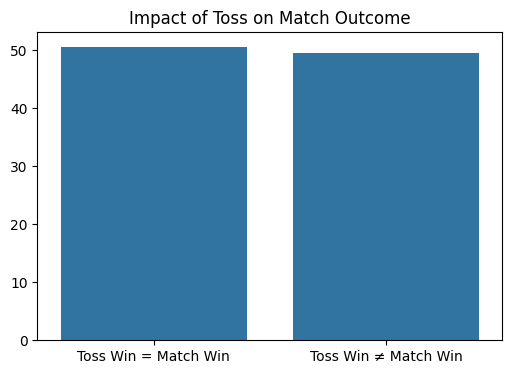

In [38]:
plt.figure(figsize=(6,4))
sns.barplot(x=['Toss Win = Match Win','Toss Win ≠ Match Win'],
            y=[toss_win_percentage, 100 - toss_win_percentage])
plt.title("Impact of Toss on Match Outcome")
plt.show()


Based on the analysis performed, here are some key insights:

* **Data Consistency**: Renaming older team names (e.g., 'Delhi
Daredevils' to 'Delhi Capitals', 'Royal Challengers Bangalore' to 'Royal Challengers Bengaluru') was crucial for consistent analysis across different seasons.

* **Batting Consistency Index**: A custom 'Consistency Index' (60% weighted average, 40% weighted strike rate) provides a balanced metric to identify batters who combine reliability with scoring impact.

* **Top Consistent Batters:** After filtering for batters who faced at
least 300 balls, players like H Klaasen, T Stubbs, and Priyansh Arya emerged as highly consistent performers, showcasing a strong balance between average and strike rate.

* **Economical Bowlers:** Bowlers such as A Kumble, GD McGrath, and M Muralitharan demonstrated exceptional economy rates, indicating their ability to restrict opposition scoring effectively.

* **Leading Wicket-Takers:** YS Chahal, B Kumar, and SP Narine are among the top wicket-takers, consistently providing crucial breakthroughs for their teams. Notably, SP Narine also appears in the list of most economical bowlers.

* **Death Over Specialists:** Sohail Tanvir, Noor Ahmad, and M Ashwin stood out with excellent death-over economies, proving their effectiveness in the critical final overs of an innings.
Bowler Performance Trade-off: The scatter plot showed a general trade-off between economy and wickets, with some bowlers excelling in one area over the other, while a few managed to maintain a good balance of both.

* **High-Scoring Venues:** Venues like Maharaja Yadavindra Singh International Cricket Stadium and Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium recorded the highest average runs per over, suggesting they are more conducive for batting.

* **Toss Impact:** Winning the toss slightly correlates with winning the match (approximately 50.56% of the time), indicating that the toss is not a definitive predictor of victory.

* **Toss Decision Preference**: When the toss-winning team also won the match, choosing to bat first had a slightly higher win percentage (54.32%) compared to fielding first (50.92%), although the difference is not substantial.